In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/sample_submission.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv


# ✈️ Flight Price Prediction using Machine Learning
 ### Introduction
This project focuses on predicting flight ticket prices using machine learning techniques. The dataset contains information related to airline, class, number of stops, departure and arrival times, source and destination, duration, and the number of days left for departure.

### Objective
The objective is to build a robust regression model capable of accurately estimating flight prices for unseen test data, which can assist in travel cost estimation and pricing strategies.

### Tools & Techniques
The code utilizes Python libraries such as **pandas, numpy, scikit-learn, matplotlib**, and **seaborn** for data preprocessing, analysis, and visualization. Feature transformation methods include **One-Hot Encoding, Target Encoding,** and **Standardization**. Multiple models are implemented including **Linear Regression, Ridge & Lasso, Decision Tree, Random Forest, KNN, XGBoost, and LightGBM.**

### Evaluation Metrics
Model performance is evaluated using:
- **Root Mean Squared Error (RMSE):** Indicates the average prediction error magnitude.
- **R-squared (R²):** Reflects how well the model explains the variance in the target variable.

These metrics guide the selection of the most effective model for final predictions.

## Importing Required Libraries
This section loads all the essential libraries needed for the project. It includes tools for data handling, visualization, preprocessing, model building, and evaluation. Only necessary libraries are imported to keep the code clean and efficient.

In [2]:
# import libraries for data handling
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer

# import libraries for model building
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# import libraries for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

# ignore warning messages in the output
import warnings
warnings.filterwarnings('ignore')

# set pandas option to show more columns in output
pd.set_option("display.max_columns", 100)


## Loading the dataset
This step reads the training and test datasets using `pandas`. It also checks the basic structure, dimensions, column names, data types, and any missing values in the training data.

In [3]:
# read the training and test datasets
train_df = pd.read_csv('/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv')
test_df = pd.read_csv('/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv')

# confirm successful loading
print("=" * 60)
print("Files loaded successfully.")
print("=" * 60)

# check dataset shapes
print("\nDataset Shapes:")
print("-" * 60)
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("=" * 60)

# preview the first 5 rows of the training data
print("\nPreview of the Training Data:")
print("-" * 60)
print(train_df.head())
print("=" * 60)

# check column data types and null counts
print("\nInfo about Training Data:")
print("-" * 60)
train_df.info()
print("=" * 60)

# check for missing values in the training set
print("\nMissing Values in Training Data:")
print("-" * 60)
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))
print("=" * 60)

# summary statistics for numerical columns
print("\nDescriptive Statistics for Numeric Columns:")
print("-" * 60)
print(train_df.describe())
print("=" * 60)

# compare columns of train and test datasets
print("\nComparing Train and Test Column Names:")
print("-" * 60)
print("Train Columns:", train_df.columns.tolist())
print("Test Columns:", test_df.columns.tolist())
print("=" * 60)


Files loaded successfully.

Dataset Shapes:
------------------------------------------------------------
Train set shape: (40000, 12)
Test set shape: (10000, 11)

Preview of the Training Data:
------------------------------------------------------------
   id    airline    flight     source      departure stops  arrival  \
0   0    Vistara    UK-930     Mumbai  Early_Morning   one    Night   
1   1  Air_India    AI-539    Chennai        Evening   one  Morning   
2   2   SpiceJet   SG-8107      Delhi  Early_Morning  zero  Morning   
3   3        NaN  0.00E+00  Hyderabad  Early_Morning  zero  Morning   
4   4  Air_India    AI-569    Chennai  Early_Morning   one  Morning   

  destination     class  duration  days_left  price  
0     Chennai  Business       NaN       40.0  64173  
1      Mumbai   Economy     16.08       26.0   4357  
2     Chennai   Economy      2.92       25.0   3251  
3   Bangalore   Economy      1.50       22.0   1776  
4   Bangalore   Economy      4.83       20.0   35

## Visual Exploratory Data Analysis (EDA)
This section explores how price varies based on key features using plots such as:

1. **Price Distribution (Histplot):** This shows how ticket prices are spread. A right-skewed distribution often indicates a few expensive flights.

2. **Price vs Days Left (Regression Plot):** This helps us confirm the intuitive trend: the closer the date, the more expensive the ticket.

3. **Price vs Duration (Scatter Plot):** This reveals whether longer flights tend to cost more — generally they do, but outliers or exceptions are visible here.

4. **Class-wise Price Distribution (Boxplot):** Visually confirms that Business class is significantly more expensive than Economy. Helps verify data quality.

5. **Airline-wise Median Price Trend:** This identifies which airlines tend to be more expensive, on average.

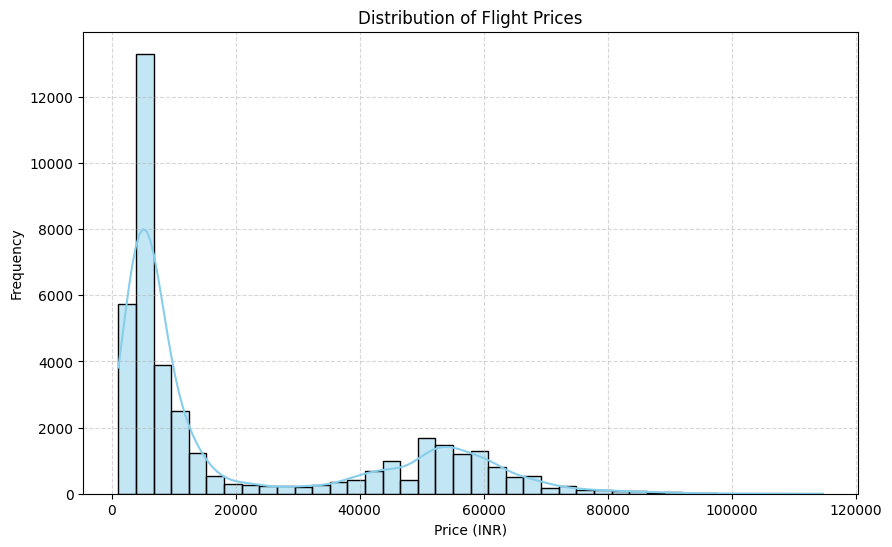

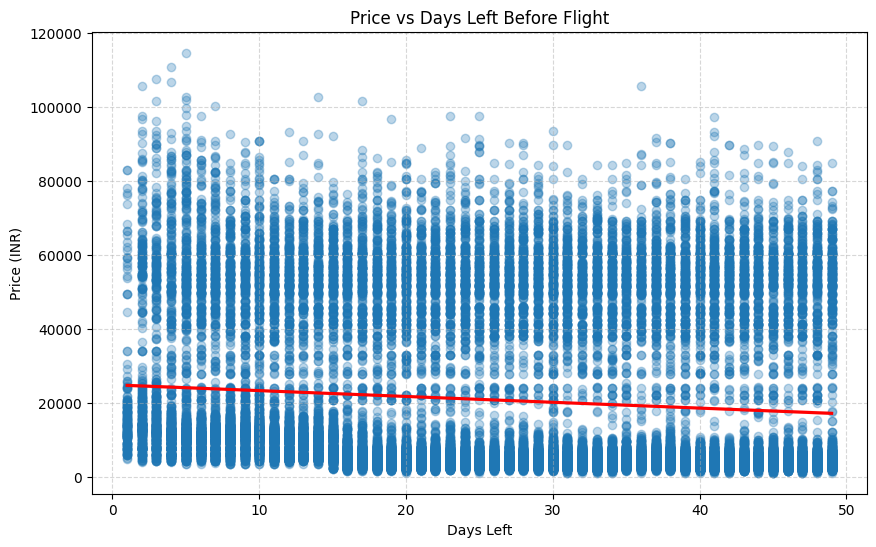

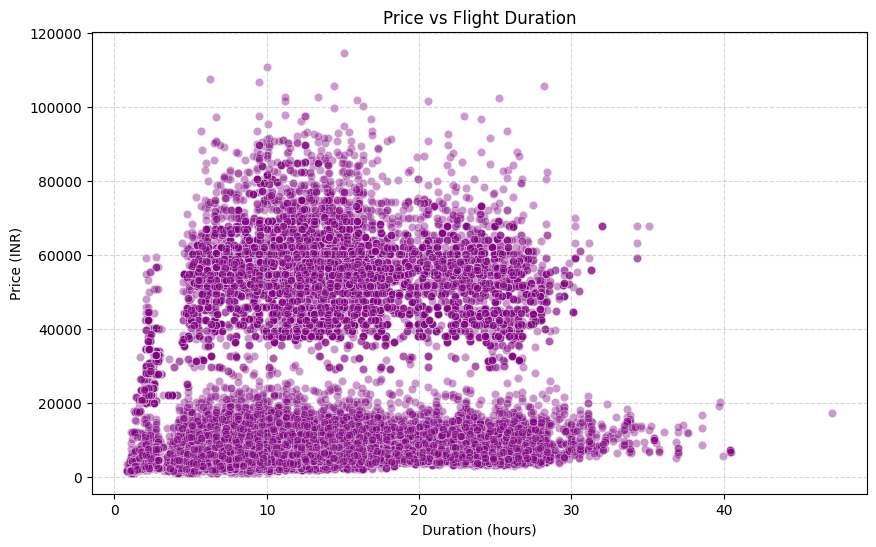

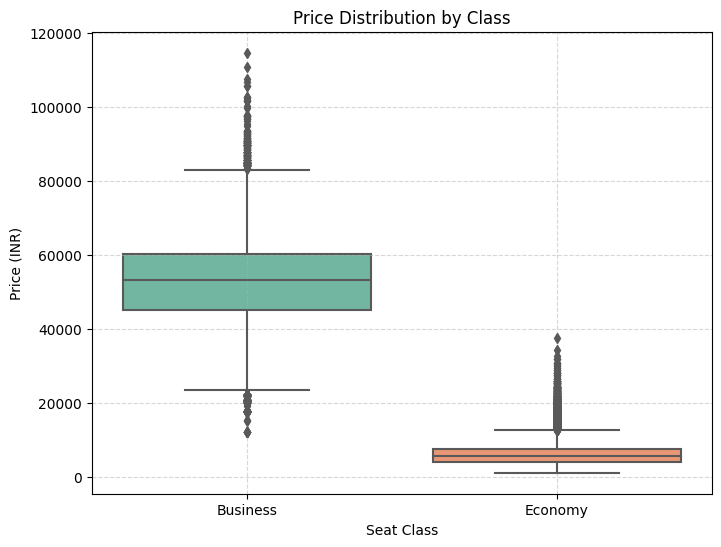

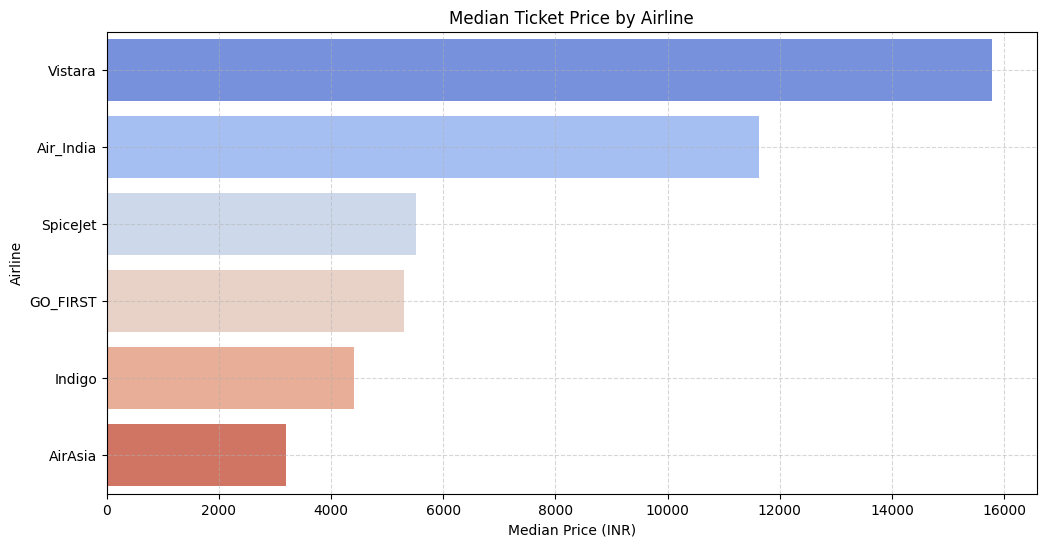

In [4]:
# plot the distribution of flight prices
plt.figure(figsize=(10, 6))
sns.histplot(train_df['price'], bins=40, kde=True, color="skyblue")
plt.title("Distribution of Flight Prices")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# plot relationship between price and days left using regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=train_df, x='days_left', y='price', scatter_kws={'alpha': 0.3}, line_kws={"color": "red"})
plt.title("Price vs Days Left Before Flight")
plt.xlabel("Days Left")
plt.ylabel("Price (INR)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# scatter plot to show how flight duration affects price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='duration', y='price', alpha=0.4, color="purple")
plt.title("Price vs Flight Duration")
plt.xlabel("Duration (hours)")
plt.ylabel("Price (INR)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# boxplot to compare price distribution across travel classes
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df, x='class', y='price', palette="Set2")
plt.title("Price Distribution by Class")
plt.xlabel("Seat Class")
plt.ylabel("Price (INR)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# bar plot to show median price for each airline
plt.figure(figsize=(12, 6))
airline_prices = train_df.groupby("airline")['price'].median().sort_values(ascending=False)
sns.barplot(x=airline_prices.values, y=airline_prices.index, palette="coolwarm")
plt.title("Median Ticket Price by Airline")
plt.xlabel("Median Price (INR)")
plt.ylabel("Airline")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## Summary of EDA
1. **Flight Price Distribution**
    - Most flights cost under ₹10,000.
    - A few flights are very costly, going over ₹1,00,000.
    - The prices are not evenly spread—cheap flights are common, expensive ones are rare.

2. **Price vs Days Left**
    - Ticket prices go up as the travel date gets closer.
    - Booking early usually gives lower prices.

3. **Price vs Duration**
    - Longer flights often cost more.
    - But even flights of the same length can have very different prices, depending on other things like airline or class.

4. **Price by Class**
    - Business class tickets cost much more than economy.
    - Business tickets are around ₹55,000, economy tickets are about ₹6,000.
    - Some tickets are priced far above the average in both classes.

5. **Price by Airline**
    - Vistara and Air India charge the most on average.
    - AirAsia and Indigo have lower prices.
    - The airline you choose has a big impact on the ticket price.

## Data Cleaning and Missing Value Handling
This step handles invalid formats, fills missing values appropriately, and removes duplicate rows to ensure clean and usable data for modeling.
1. **Replace invalid scientific notation with NaN:** Some numeric values may be stored as strings like '1.2e+05', which are replaced with NaN to standardize the data.

2. **Handle missing values:**
    - *Categorical columns (like airline or source):* Missing entries are filled with a placeholder "(unknown)" to preserve the structure without dropping rows.
    - *Numerical columns (like duration or price):* Converted to numeric format and missing values are filled with the column’s median to reduce the impact of extreme values.

3. **Drop duplicate rows:** Any repeated entries in the training dataset (excluding the unique id column) are removed to ensure each row adds unique information to the model.

4. **Final check for missing values:** After cleaning, a summary is printed to confirm that no missing data remains in either the training or test datasets.

In [5]:
# make copies of original datasets to avoid modifying the raw data
cleaned_train = train_df.copy()
cleaned_test = test_df.copy()

# step 1: replace scientific notation strings with NaN
for df in [cleaned_train, cleaned_test]:
    df.replace(to_replace=r'^\d+\.\d+[eE][+-]?\d+$', value=np.nan, regex=True, inplace=True)

# step 2: handle missing values
for df in [cleaned_train, cleaned_test]:
    for col in df.columns:
        if df[col].dtype == "object":
            df[col].fillna("(unknown)", inplace=True)
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df[col].fillna(df[col].median(), inplace=True)

# step 3: drop duplicate rows from training data (excluding 'id' column)
initial_shape = cleaned_train.shape
cleaned_train.drop_duplicates(
    subset=[col for col in cleaned_train.columns if col != 'id'],
    inplace=True
)
print("=" * 60)
print(f"dropped {initial_shape[0] - cleaned_train.shape[0]} duplicate rows from training data.")

# step 4: check if any missing values remain after cleaning
print("\nremaining missing values in cleaned training data:")
print(cleaned_train.isnull().sum()[cleaned_train.isnull().sum() > 0])

print("\nremaining missing values in cleaned test data:")
print(cleaned_test.isnull().sum()[cleaned_test.isnull().sum() > 0])
print("=" * 60)


dropped 360 duplicate rows from training data.

remaining missing values in cleaned training data:
Series([], dtype: int64)

remaining missing values in cleaned test data:
Series([], dtype: int64)


## Outlier Detection and Treatment (Using IQR Method)
- **Purpose:** The dataset contains extreme values in columns like price, duration, and days_left. These outliers can negatively affect model training by making it learn incorrect patterns.

- **Approach Used:** Instead of removing outliers, the code applies the Interquartile Range (IQR) method to cap extreme values. This ensures that the data remains within a sensible range while preserving all records.

- **Reason for Choosing IQR Method:**
    - *Z-score* was not suitable as it works best for normally distributed data, which this dataset is not.
    - *Fixed limits* are not flexible and may not generalize well across different datasets.
    - *Dropping outliers* would result in data loss and reduce model learning potential.

Using the IQR method helps keep the data balanced, avoids removing useful information, and adapts to the actual distribution of the dataset.

In [6]:
# create copies of the cleaned data to work on
df = cleaned_train.copy()
df_test = cleaned_test.copy()

# function to cap outliers using the interquartile range (IQR) method
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # count how many values will be capped
    outlier_count = ((data[column] < lower_limit) | (data[column] > upper_limit)).sum()

    # cap values outside the IQR range
    data[column] = data[column].clip(lower=lower_limit, upper=upper_limit)

    print(f"{column}: capped {outlier_count} outlier(s) to range [{round(lower_limit, 2)}, {round(upper_limit, 2)}]")

# columns with potential outliers in the training dataset
train_outlier_columns = ['price', 'duration', 'days_left']

# columns to cap in the test dataset (price is not present)
test_outlier_columns = ['duration', 'days_left']

# apply capping on training data
for column in train_outlier_columns:
    cap_outliers_iqr(df, column)

# apply capping on test data
for column in test_outlier_columns:
    cap_outliers_iqr(df_test, column)
print("=" * 60)
# show final summary statistics of capped columns in training data
print("\nsummary statistics after outlier treatment:")
print(df[train_outlier_columns].describe())


price: capped 14 outlier(s) to range [-51968.0, 99112.0]
duration: capped 469 outlier(s) to range [-5.63, 28.05]
days_left: capped 0 outlier(s) to range [-14.0, 66.0]
duration: capped 81 outlier(s) to range [-6.07, 28.57]
days_left: capped 0 outlier(s) to range [-15.5, 68.5]

summary statistics after outlier treatment:
              price      duration     days_left
count  39640.000000  39640.000000  39640.000000
mean   20740.136983     11.904369     26.177245
std    22704.807269      6.753816     12.756170
min     1105.000000      0.830000      1.000000
25%     4687.000000      7.000000     16.000000
50%     7352.000000     11.080000     26.000000
75%    42457.000000     15.420000     36.000000
max    99112.000000     28.050000     49.000000


## Feature Engineering
This step prepares the dataset for modeling by identifying different types of features and creating new ones to capture useful patterns. Columns are divided into numerical, low-cardinality categorical, and high-cardinality categorical based on their unique values. New features such as `departure_hour` are also created.

In [7]:
# make copies of the cleaned and capped data
df = df.copy()
df_test = df_test.copy()

# check columns and number of unique values for object-type features
print("columns and unique value counts:")
for col in df.columns:
    if df[col].dtype == "object":
        print(f"{col}: {df[col].nunique()} unique values")
print("=" * 60)

# define numerical features based on earlier analysis
num_cols = ['duration', 'days_left']

# define high-cardinality features (too many unique values for one-hot encoding)
high_card_cols = ['flight']

# define low-cardinality categorical features (suitable for one-hot encoding)
low_card_cols = []
for col in df.columns:
    if df[col].dtype == 'object' and col not in high_card_cols and col != 'id':
        if df[col].nunique() <= 15:
            low_card_cols.append(col)

# display final lists of features
print("\nnumerical features:", num_cols)
print("low-cardinality categorical features:", low_card_cols)
print("high-cardinality categorical features:", high_card_cols)
print("=" * 60)

# create new feature 'departure_hour' based on time category
departure_map = {
    'Early_Morning': 5,
    'Morning': 9,
    'Afternoon': 13,
    'Evening': 18,
    'Night': 22,
    'Late_Night': 2
}
for data in [df, df_test]:
    data['departure_hour'] = data['departure'].map(departure_map)

# optionally create 'is_weekend_flight' if day_of_week column exists
if 'day_of_week' in df.columns:
    for data in [df, df_test]:
        data['is_weekend_flight'] = data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)


columns and unique value counts:
airline: 7 unique values
flight: 792 unique values
source: 6 unique values
departure: 7 unique values
stops: 4 unique values
arrival: 6 unique values
destination: 6 unique values
class: 2 unique values

numerical features: ['duration', 'days_left']
low-cardinality categorical features: ['airline', 'source', 'departure', 'stops', 'arrival', 'destination', 'class']
high-cardinality categorical features: ['flight']


## Encoding and Scaling
This step applies appropriate encoding for categorical features and scaling for numerical features. It uses **ColumnTransformer** to combine all transformations into one step to ensure consistency between training and test data.

- Target encoding is used for high-cardinality features like `flight` to avoid creating too many dummy variables.
- One-hot encoding is applied to low-cardinality features like `airline`, `source`, and `class`.
- Numerical features like `duration` and `days_left` are scaled using **StandardScaler**.
- All transformations are combined using **ColumnTransformer** to keep the process clean and modular.

In [8]:
# separate features and target column from training data
X = cleaned_train.drop(columns='price')
y = cleaned_train['price']

# copy test data
X_test = cleaned_test.copy()

# define feature types
num_features = ['duration', 'days_left']
low_card_cat_features = ['airline', 'source', 'departure', 'stops', 'arrival', 'destination', 'class']
high_card_cat_features = ['flight']

# apply target encoding to high-cardinality feature 'flight'
te = TargetEncoder()
X['flight_te'] = te.fit_transform(X['flight'], y)
X_test['flight_te'] = te.transform(X_test['flight'])

# drop original 'flight' column
X = X.drop(columns='flight')
X_test = X_test.drop(columns='flight')

# update final feature lists
final_num_features = num_features + ['flight_te']
final_cat_features = low_card_cat_features

# define column transformer for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), final_num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), final_cat_features)
    ]
)

# apply transformations to training and test data
X_processed = preprocessor.fit_transform(X)
X_test_processed = preprocessor.transform(X_test)

# check shapes of processed arrays
print("\nprocessed data shapes:")
print("-" * 60)
print("training features shape:", X_processed.shape)
print("test features shape    :", X_test_processed.shape)
print("-" * 60)



processed data shapes:
------------------------------------------------------------
training features shape: (39640, 41)
test features shape    : (10000, 41)
------------------------------------------------------------


## Train-test split
This step splits the processed training data into training and validation sets using an **80–20 ratio**. It helps evaluate model performance on unseen data before final testing.

In [9]:
# separate features (X) and target (y)
X = X_processed.copy()
y = df['price'].copy()

print("=" * 60)
print("splitting data into training and validation sets")
print("=" * 60)

# split data into 80% training and 20% validation
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# print shapes of resulting datasets
print("\nresulting data shapes:")
print("-" * 60)
print("training features   :", X_train_split.shape)
print("validation features :", X_valid_split.shape)
print("training target     :", y_train_split.shape)
print("validation target   :", y_valid_split.shape)
print("=" * 60)


splitting data into training and validation sets

resulting data shapes:
------------------------------------------------------------
training features   : (31712, 41)
validation features : (7928, 41)
training target     : (31712,)
validation target   : (7928,)


## Model Training and Evaluation
This step involves training multiple regression models on the prepared dataset. Each model is evaluated using **Root Mean Squared Error (RMSE)** and **R-squared (R²)** metrics. The results are stored for comparison and selection of the best-performing model. 
7 Models trained are:

1. **Linear Regression**
2. **Lasso Regression**
3. **Decision Tree Regressor**
4. **XGBoost**
5. **LightGBM Regressor**
6. **K-Nearest Neighbors Regressor**
7. **Random Forest**

In [10]:
# define a reusable function to train a model and print evaluation metrics
def evaluate_model(name, model, X_train, y_train, X_valid, y_valid, results):
    model.fit(X_train, y_train)                    # train the model
    preds = model.predict(X_valid)                 # make predictions on validation set

    rmse = np.sqrt(mean_squared_error(y_valid, preds))  # calculate root mean squared error
    r2 = r2_score(y_valid, preds)                        # calculate R² score

    # display model name and performance
    print(f"model: {name}")
    print(f"rmse: {rmse:.2f}")
    print(f"r² score: {r2:.4f}")
    print("-" * 40)

    # store the evaluation metrics in dictionary
    results[name] = {'RMSE': rmse, 'R2': r2}

# dictionary to store evaluation results for all models
model_metrics = {}

# train and evaluate linear regression
lin_model = LinearRegression()
evaluate_model("Linear Regression", lin_model, X_train_split, y_train_split, X_valid_split, y_valid_split, model_metrics)

# train and evaluate lasso regression
lasso_model = Lasso(alpha=0.1)
evaluate_model("Lasso Regression", lasso_model, X_train_split, y_train_split, X_valid_split, y_valid_split, model_metrics)

# train and evaluate decision tree regression
dt_model = DecisionTreeRegressor(random_state=42)
evaluate_model("Decision Tree", dt_model, X_train_split, y_train_split, X_valid_split, y_valid_split, model_metrics)

# train and evaluate xgboost regression
xgb_model = XGBRegressor(n_estimators=20, learning_rate=0.1, random_state=42)
evaluate_model("XGBoost", xgb_model, X_train_split, y_train_split, X_valid_split, y_valid_split, model_metrics)

# train and evaluate lightgbm regression
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
evaluate_model("LightGBM", lgbm_model, X_train_split, y_train_split, X_valid_split, y_valid_split, model_metrics)

# train and evaluate k-nearest neighbors regression
knn_model = KNeighborsRegressor(n_neighbors=5)
evaluate_model("KNN", knn_model, X_train_split, y_train_split, X_valid_split, y_valid_split, model_metrics)

# train and evaluate random forest regression
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)
evaluate_model("Random Forest", rf_model, X_train_split, y_train_split, X_valid_split, y_valid_split, model_metrics)


model: Linear Regression
rmse: 6771.02
r² score: 0.9121
----------------------------------------
model: Lasso Regression
rmse: 6771.04
r² score: 0.9121
----------------------------------------
model: Decision Tree
rmse: 4275.86
r² score: 0.9649
----------------------------------------
model: XGBoost
rmse: 5222.55
r² score: 0.9477
----------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 31712, number of used features: 41
[LightGBM] [Info] Start training from score 20706.288030
model: LightGBM
rmse: 3644.01
r² score: 0.9745
----------------------------------------
model: KNN
rmse: 5737.33
r² score: 0.9369
----------------------------------------
model: Random Forest
rmse: 3290.33
r² score: 0.

## Hyperparameter Tuning for Top 3 Performing Models
Based on initial evaluation metrics (`R²` and `RMSE`), Random Forest, LightGBM, and Decision Tree models delivered the highest performance.
To further optimize their predictive power, **GridSearchCV** is applied on each of them to search for the best combination of hyperparameters.
1. **Decision Tre**e is tuned with max_depth and min_samples_split.
2. **LightGBM** is tuned with n_estimators, learning_rate, and num_leaves
3. **Random Forest** is tuned with n_estimators, max_depth, and min_samples_split.

Each tuning process uses `3-fold cross-validation` and `RMSE` as the scoring metric to ensure robustness. The best estimator from each model is saved in the `best_models` dictionary for downstream use.

In [11]:

# Dictionary to store best models
best_models = {}

# 1. Decision Tree Tuning
dt_params = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

dt_model = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dt_model, dt_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
dt_grid.fit(X_train_split, y_train_split)

print("Best Decision Tree Params:", dt_grid.best_params_)
print("Best RMSE:", -dt_grid.best_score_)
print("-" * 60)

# Save the best model
best_models['Decision Tree'] = dt_grid.best_estimator_

#  2. LightGBM Tuning
lgb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50]
}

lgb_model = LGBMRegressor(random_state=42)
lgb_grid = GridSearchCV(lgb_model, lgb_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
lgb_grid.fit(X_train_split, y_train_split)

print("Best LightGBM Params:", lgb_grid.best_params_)
print("Best RMSE:", -lgb_grid.best_score_)
print("-" * 60)

best_models['LightGBM'] = lgb_grid.best_estimator_

# 3. Random Forest Tuning
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_split, y_train_split)

print("Best Random Forest Params:", rf_grid.best_params_)
print("Best RMSE:", -rf_grid.best_score_)
print("-" * 60)

best_models['Random Forest'] = rf_grid.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Decision Tree Params: {'max_depth': 20, 'min_samples_split': 10}
Best RMSE: 4237.079025674048
------------------------------------------------------------
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 31712, number of used features: 41
[LightGBM] [Info] Start training from score 20706.288030
Best LightGBM Params: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 50}
Best RMSE: 3669.4974285392436
------------------------------------------------------------
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 5, 'n_esti

## Model Performance Comparison
This section consolidates performance metrics (`RMSE` and `R²`) for all trained models.
A sorted table and **bar chart** are generated to clearly visualize and compare model accuracy. The top-performing model is identified based on **lowest RMSE** and **highest R² score**.

Sorted model performance (by lowest RMSE first):


,Model,RMSE,R2
0,Random Forest,3290.329835,0.979238
1,LightGBM,3644.013804,0.974535
2,Decision Tree,4275.860913,0.964939
3,XGBoost,5222.551677,0.947695
4,KNN,5737.329941,0.936875
5,Linear Regression,6771.016951,0.912080
6,Lasso Regression,6771.035997,0.912079


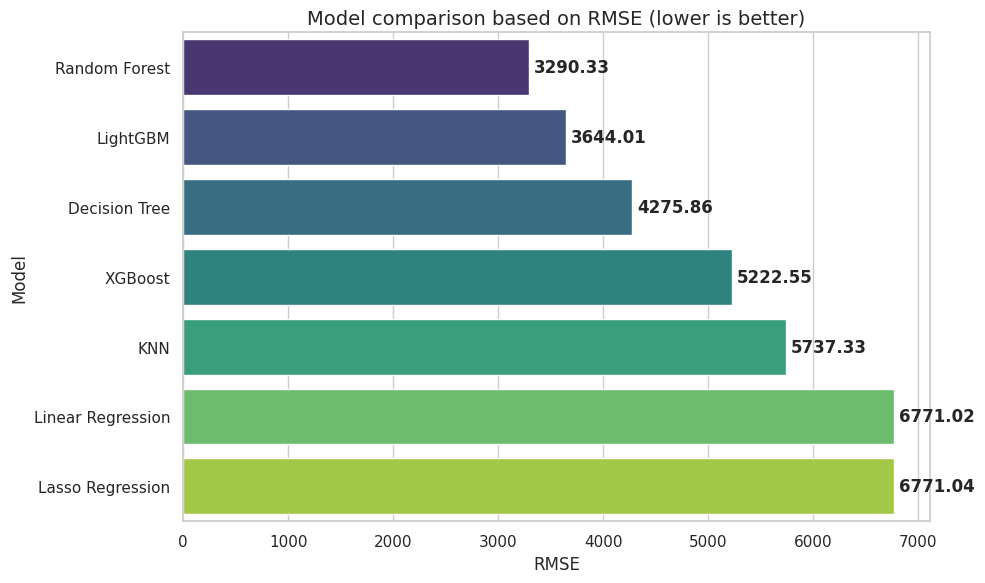

Best model: Random Forest
RMSE: 3290.33
R² Score: 0.9792


In [12]:
# convert the model_metrics dictionary to a dataframe for easy viewing
model_df = pd.DataFrame(model_metrics).T  # transpose so models are rows
model_df.reset_index(inplace=True)
model_df.rename(columns={'index': 'Model'}, inplace=True)

# sort models by RMSE in ascending order (lower RMSE is better)
sorted_model_df = model_df.sort_values(by='RMSE', ascending=True).reset_index(drop=True)

# display the sorted dataframe of model performance
print("Sorted model performance (by lowest RMSE first):")
display(sorted_model_df)

# set seaborn style for better visual appearance
sns.set(style="whitegrid")

# plot a horizontal bar chart for RMSE of each model
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=sorted_model_df,
    x='RMSE', y='Model', palette='viridis'
)

# add RMSE value labels on each bar
for i, v in enumerate(sorted_model_df['RMSE']):
    plt.text(v + 50, i, f"{v:.2f}", va='center', fontweight='bold')

plt.title("Model comparison based on RMSE (lower is better)", fontsize=14)
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# extract the best performing model based on lowest RMSE
best_model_name = sorted_model_df.iloc[0]['Model']
best_rmse = sorted_model_df.iloc[0]['RMSE']
best_r2 = sorted_model_df.iloc[0]['R2']

print(f"Best model: {best_model_name}")
print(f"RMSE: {best_rmse:.2f}")
print(f"R² Score: {best_r2:.4f}")


## Final Model Training and Test Prediction
Retrain the best-performing model **(Random Forest)** using the full training dataset by combining `X_train_split` and `X_valid_split`. This ensures the model learns from all available labeled data. Maintain reproducibility using a fixed random_state. Generate predictions on the test set and use `np.clip()` to avoid negative price outputs. This step prepares the final submission-ready results.

In [13]:
# apply the fitted preprocessing pipeline. use the already fitted ColumnTransformer (do not refit)
X_test_processed = preprocessor.transform(X_test)

# combine training and validation sets
from scipy.sparse import vstack

X_final_train = vstack([X_train_split, X_valid_split])
y_final_train = pd.concat([y_train_split, y_valid_split], axis=0)

# retrain the best model with optimal parameters
best_rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
best_rf_model.fit(X_final_train, y_final_train)

# generate predictions on the test data
test_preds = best_rf_model.predict(X_test_processed)

# clip predictions to avoid negative values
test_preds = np.clip(test_preds, 0, None)

# prepare the submission file
submission = pd.DataFrame({
    "id": range(len(test_preds)),
    "price": test_preds
})

# export to CSV for submission
submission.to_csv("submission.csv", index=False)
print("submission.csv file created successfully.")


submission.csv file created successfully.


In [14]:
submission = pd.read_csv("/kaggle/working/submission.csv")
submission.head()

,id,price
0,0,4736.295720
1,1,11089.784148
2,2,4799.364145
3,3,58559.963033
4,4,49384.314823
